## Introduction

> **Investigating TMDB 5000 Movies & Credits Dataset**
>
> **Descriptions:** This data set contains information about 10,000 movies collected from The Movie Database \(TMDb\), including user ratings and revenue.

**columns descriptions for tmdb\_5000\_movies.csv:**

- **id**: the unique identifier for each movie.
- **popularity**:popularity for each movie.
- **budget**: Movie budget.
- **revenue**: Movie revenue.
- **original\_title**: Movie Title.
- **homepage**: Movie webpage link.
- **tagline**: Movie tagline.
- **keywords**:Movie keywords.
- **overview**: Movie overview.
- **runtime**: Movie run times.
- **genres**: Movie genres.
- **production\_companies**: Movie production 
- **release\_date**: Movie release date \(month/day/year\). 
- **vote\_count**: Movie vote count.
- **vote\_average**: Movie vote average.
- **title**: Movie Title.
- **spoken\_languages**: Languages spoken for the movie
- **original\_language**: Oroginal language spoken for the movie
- **production\_countries**: Movie production countries
- **movie\_id**: the unique identifier for each movie. \(tmdb\_5000\_credits.csv\)



**columns descriptions for tmdb\_5000\_credits.csv:**

- **movie\_id**: the unique identifier for each movie. 
- **title**: Movie Title.
- **cast:** the casts for the movie. 
- **crew**: the crew for the movie. 



In [1]:
#importing libraries that will be used to investigate Dataset

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

import warnings; warnings.simplefilter('ignore')

## Data Wrangling

**We will follow a three step process:**

>

1. \*Gathering the data\* from `tmdb_5000_movies.csv` and  `tmdb_5000_credits.csv` for the purpose of investigation and understanding 
2. \*Accessing the data\* to identify different issues with `data type` , `structure` , or `quality` .
3. \*Cleaning the data\* by changing the data types, replacing values, removing unnecessay data and movies dataset for easy and fast analysis.



# Step 1: Gathering the Data

## Loading the CSV file into Dataframe



##



In [2]:
moviesD = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
moviesD.shape


(4803, 20)

In [4]:
moviesD.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [5]:
credits.shape

(4803, 4)

In [6]:
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


We can see that in the moviesD, we can convert Genres Column from json format to a list. 

## Convert Genres Column from json format to a list


In [7]:
moviesD['genres'] = moviesD['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [8]:
moviesD.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


As you can see, Genres is now a list format instead of the json format. 

## Now we can combine the 2 csv files together and start assessing the data. 

In [9]:
movies = pd.merge(moviesD, credits)

In [10]:
movies.shape

(4809, 23)

# Step 2: Assessing the Data

## Checking the DataFrame basic information \(columns names, number of values, data types ......\)



In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

## Checking the Dataframe shape \(number of rows and columns\)



In [12]:
#checking 5 rows sample from Dataframe

movies.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
2543,15000000,"[Comedy, Drama]",NaN,586,"[{""id"": 521, ""name"": ""washington d.c.""}, {""id""...",en,Wag the Dog,"During the final weeks of a presidential race,...",13.581966,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",...,97.0,"[{""iso_639_1"": ""sq"", ""name"": ""shqip""}, {""iso_6...",Released,"A comedy about truth, justice and other specia...",Wag the Dog,6.7,270,586,"[{""cast_id"": 5, ""character"": ""Stanley Motss"", ...","[{""credit_id"": ""52fe4258c3a36847f8016f79"", ""de..."
3416,0,"[Comedy, Drama]",NaN,13919,"[{""id"": 236, ""name"": ""suicide""}, {""id"": 494, ""...",en,The Chumscrubber,The Chumscrubber is a dark comedy about the li...,3.528643,"[{""name"": ""Lawrence Bender Productions"", ""id"":...",...,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear. Trust. Love.,The Chumscrubber,6.7,62,13919,"[{""cast_id"": 1, ""character"": ""Dean"", ""credit_i...","[{""credit_id"": ""52fe45b49251416c7505f9cd"", ""de..."
588,70000000,"[Drama, Crime]",http://www.wallstreetmoneyneversleeps.com/,33909,"[{""id"": 179431, ""name"": ""duringcreditsstinger""}]",en,Wall Street: Money Never Sleeps,As the global economy teeters on the brink of ...,23.256450,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,133.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Gordon never gives up.,Wall Street: Money Never Sleeps,5.8,493,33909,"[{""cast_id"": 8, ""character"": ""Gordon Gekko"", ""...","[{""credit_id"": ""52fe45429251416c9102c3bf"", ""de..."
4124,2000000,"[Action, Adventure, Science Fiction]",NaN,24746,"[{""id"": 10183, ""name"": ""independent film""}]",en,Six-String Samurai,In a post-apocalyptic world where the Russians...,1.892183,"[{""name"": ""HSX Films"", ""id"": 4714}]",...,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vegas Needs a New King.,Six-String Samurai,5.8,36,24746,"[{""cast_id"": 1, ""character"": ""Buddy"", ""credit_...","[{""credit_id"": ""52fe44a6c3a368484e02f2cb"", ""de..."
2991,10000000,"[Action, Drama, History, War]",NaN,9289,"[{""id"": 1956, ""name"": ""world war ii""}, {""id"": ...",en,The Longest Day,"The retelling of June 6, 1944, from the perspe...",19.524972,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,178.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,This is the day that changed the world... When...,The Longest Day,7.2,234,9289,"[{""cast_id"": 20, ""character"": ""Col. Thompson"",...","[{""credit_id"": ""53ba7918c3a3685eb1006f7a"", ""de..."


In [13]:
movies.shape

(4809, 23)

## Checking the DataFrame for more information and descriptive statistics



In [14]:
movies.describe().round()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4809.0,4809.0,4809.0,4.809000e+03,4807.0,4809.0,4809.0,4809.0
mean,29027803.0,57121.0,21.0,8.227511e+07,107.0,6.0,690.0,57121.0
std,40704731.0,88653.0,32.0,1.628379e+08,23.0,1.0,1234.0,88653.0
min,0.0,5.0,0.0,0.000000e+00,0.0,0.0,0.0,5.0
25%,780000.0,9012.0,5.0,0.000000e+00,94.0,6.0,54.0,9012.0
50%,15000000.0,14624.0,13.0,1.917000e+07,103.0,6.0,235.0,14624.0
75%,40000000.0,58595.0,28.0,9.291317e+07,118.0,7.0,737.0,58595.0
max,380000000.0,459488.0,876.0,2.787965e+09,338.0,10.0,13752.0,459488.0


## Checking for Number of Null Values for each Column



In [15]:
movies.isnull().sum()


budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

# Step 3: Cleaning the Data



## Missing Data

1. homepage homepage column has 3091 NaNs \(empty\_value\) 
2. tagline column has 844 NaNs \(empty\_value\)

## Quality Data Issues

1. id column data type is integer not string.
2. release\_date column data type is string not datetime.
3. Unnecessary columns \["production\_companies", "budget", "runtime", "spoken\_languges", "homepage", "revenue"," status", "original\_language", "tagline", "popularity","production\_countries","movie\_id"\] 



In [16]:
# Make copy of original dataframe to clean

movies_clean = movies.copy()

## Solution for Missing Data

### Number 1: homepage column has 3091 NaNs \(empty\_value\)

Solution: Drop homepage column using .drop\(\) method.


In [17]:
# Drop homepage column

movies_clean.drop("homepage", axis=1, inplace = True)

Confirm that the column has already been dropped by using "in"



In [18]:
"homepage" in movies_clean.columns

False

### Number 2: tagline column has 844 NaNs \(empty\_value\)

Solution: Drop tagline column using .drop\(\) method.


In [19]:
# Drop tagline column

movies_clean.drop("tagline", axis=1, inplace = True)

Confirm that the column has already been dropped by using "in"


In [20]:
"tagline" in movies_clean.columns

False

## Solution for Quality Issues

## Number 1: id column data type is integer not string

Solution: Change id column type to string using .astype\(\) method.


In [21]:
# Change id column type to string

movies_clean.id = movies_clean.id.astype(str)

Confirm id type already changed


In [22]:
movies_clean.id.dtypes

dtype('O')

## Number 2: release\_date column data type is string not datetime

Solution: Change release\_date column type to datetime using .to\_datetime\(\) method.


In [23]:
type(movies_clean.release_date[0])

str

In [24]:
# Change release_date column type to datetime

movies_clean.release_date = pd.to_datetime(movies_clean.release_date) 

Confirm release_date type already changed



In [25]:
type(movies_clean.release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

## Number 3: Unneccessary columns to be removed

Solution: Drop Unnecessary columns using .drop\(\) method

Columns to drop : \["production\_companies", "budget", "runtime", "spoken\_languages", "homepage", "revenue"," status", "original\_language", "tagline","production\_countries"\] 



tagline and homepage has already been dropped from the Solution for Missing Data Part. Hence, just remove the remaining columns.


In [26]:
# Drop Unnecessary columns 

movies_clean.drop(["production_companies","budget","revenue","runtime","spoken_languages","status","original_language","production_countries","movie_id"], axis = 1, inplace = True)

Confirm Unnecessary columns already dropped


In [27]:
movies_clean.columns

Index(['genres', 'id', 'keywords', 'original_title', 'overview', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

<img src=".NLP Movie Recommendation System.ipynb.upload/paste-0.9128501930580106"     style="object-fit:cover"/><img src=".NLP Movie Recommendation System.ipynb.upload/paste-0.png"     style="object-fit:cover"/>



# Research Questions [VISUALISATION]

## What's the top 10 most popular movies?



<AxesSubplot:ylabel='original_title'>

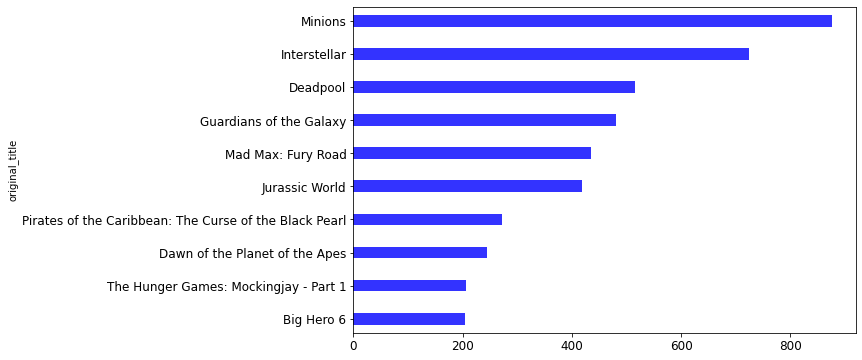

In [28]:
top_ten_popular = movies_clean.nlargest(10,"popularity")[["original_title", "popularity"]]
top_ten_popular.groupby("original_title")["popularity"].sum().sort_values().plot(kind="barh",rot = 0,width = 0.35,color=["blue"],alpha = 0.8, fontsize = 12,figsize=(9,6),)

From the graph above, you can see clearly that Minions is the most popular movie, followed by Interstellar, etc.

## What are the top 10 rated movies based off "vote\_count" and "vote\_average"?



In [29]:
# Checking the top 10 vote_average movies and their vote_counts
movies_clean.nlargest(10,"vote_average")[["original_title","vote_average","vote_count"]]

,original_title,vote_average,vote_count
3524,Stiff Upper Lips,10.0,1
4052,"Dancer, Texas Pop. 81",10.0,1
4254,Me You and Five Bucks,10.0,2
4668,Little Big Top,10.0,1
3999,Sardaarji,9.5,2
2392,One Man's Hero,9.3,2
1887,The Shawshank Redemption,8.5,8205
2975,There Goes My Baby,8.5,2
2802,The Prisoner of Zenda,8.4,11
3342,The Godfather,8.4,5893


When we look at the table above, we can see that the list of movies with high average vote have very low vote counts. Hence we cannot consider these movies as top rated movies.



In [30]:
# Now we will try use the largest vote counts and then sort them out

top_ten_rated = movies_clean.nlargest(10,"vote_count")[["original_title","vote_average","vote_count"]]
top_ten_rated

,original_title,vote_average,vote_count
96,Inception,8.1,13752
65,The Dark Knight,8.2,12002
0,Avatar,7.2,11800
16,The Avengers,7.4,11776
788,Deadpool,7.4,10995
95,Interstellar,8.1,10867
287,Django Unchained,7.8,10099
94,Guardians of the Galaxy,7.9,9742
426,The Hunger Games,6.9,9455
127,Mad Max: Fury Road,7.2,9427


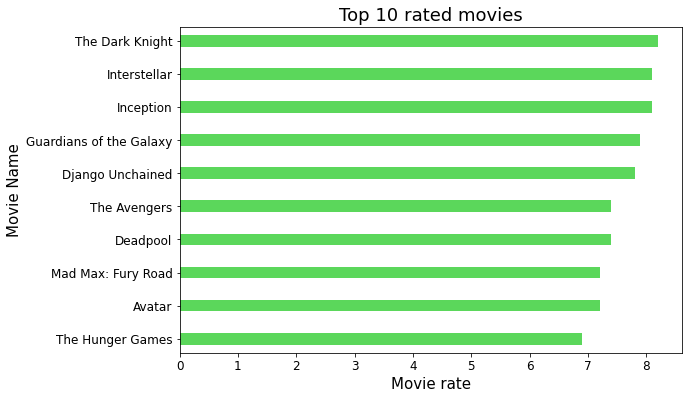

In [31]:
# Group by top ten rated movies with high vote counts to make it seem less biased

top_ten_rated.groupby("original_title")["vote_average"].sum().sort_values().plot(kind="barh",rot = 0,width = 0.35,color=["limegreen"],alpha = 0.8,fontsize = 12,figsize=(9,6),)

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Movie rate",fontsize=15, color="k")
plt.title("Top 10 rated movies", fontsize=18, color="k");

We can conclude that the most highly rated movie is the Dark Knight, followed by Interstellar, etc. 


## Is there a correlation between vote\_count and popularity?



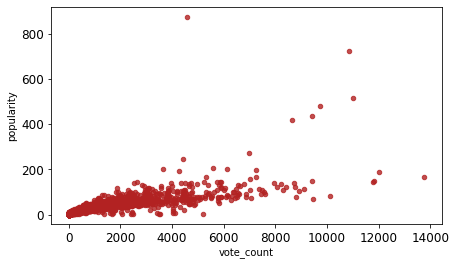

In [32]:
# Scatter plot between vote_count and popularity 

movies_clean.plot(kind="scatter",
                  rot = 0,
                  x = 'vote_count',
                  y = 'popularity',
                  color=["firebrick"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

From scatter plot above, it shows that there is a very strong positive correlation between vote count and popularity.


## Let us look at the distribution of the following numerical variables,

In [33]:
numericalmoviedata = movies_clean[["popularity","vote_count","vote_average"]]

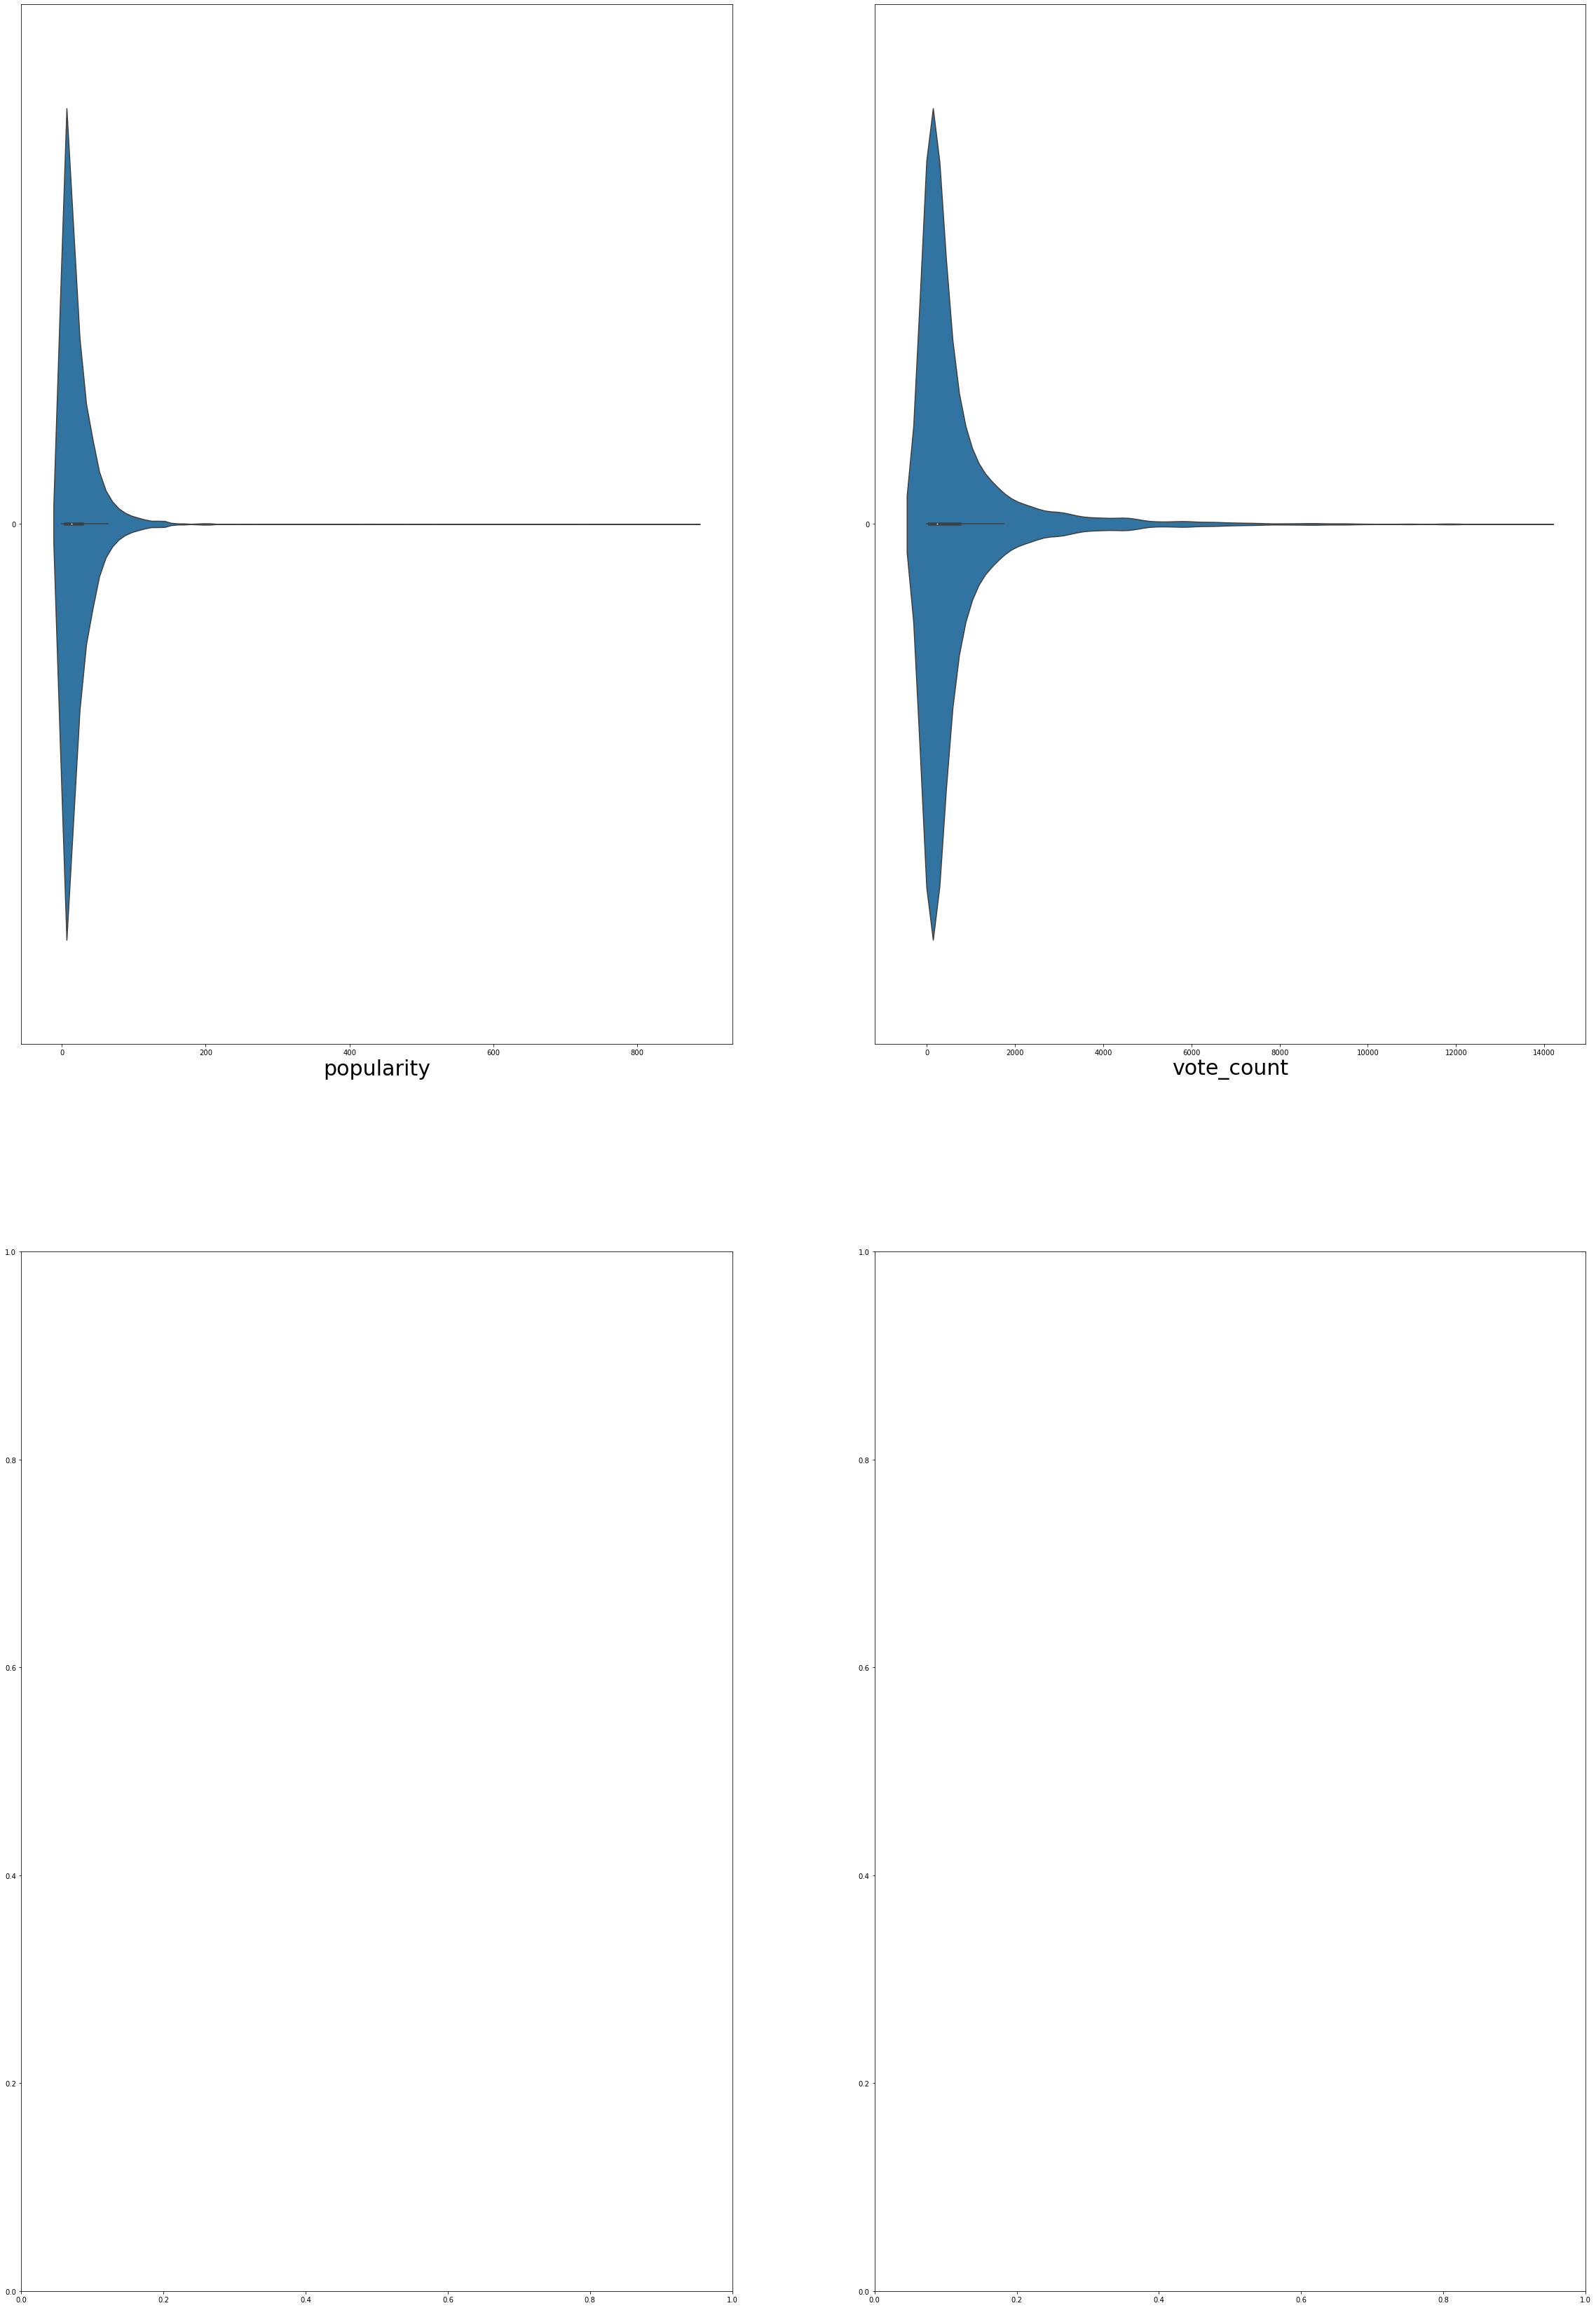

In [34]:
# Draw the distributions of all variables
f, axes = plt.subplots(2,2, figsize=(40,60))
count = 0
row = 0
othernumericaldata = [x for x in numericalmoviedata.columns if x != 'vote_average']
for var in othernumericaldata:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sns.violinplot(data = numericalmoviedata[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

As seen from these graphs, most of the numerical values are quite skewed to the left.

Here is the distribution of vote_average alone as it is our most important variable as it is our indicator if a movie is "good"

In [35]:
numericalmoviedata["vote_average"].describe()

count    4809.000000
mean        6.092514
std         1.193989
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

<AxesSubplot:>

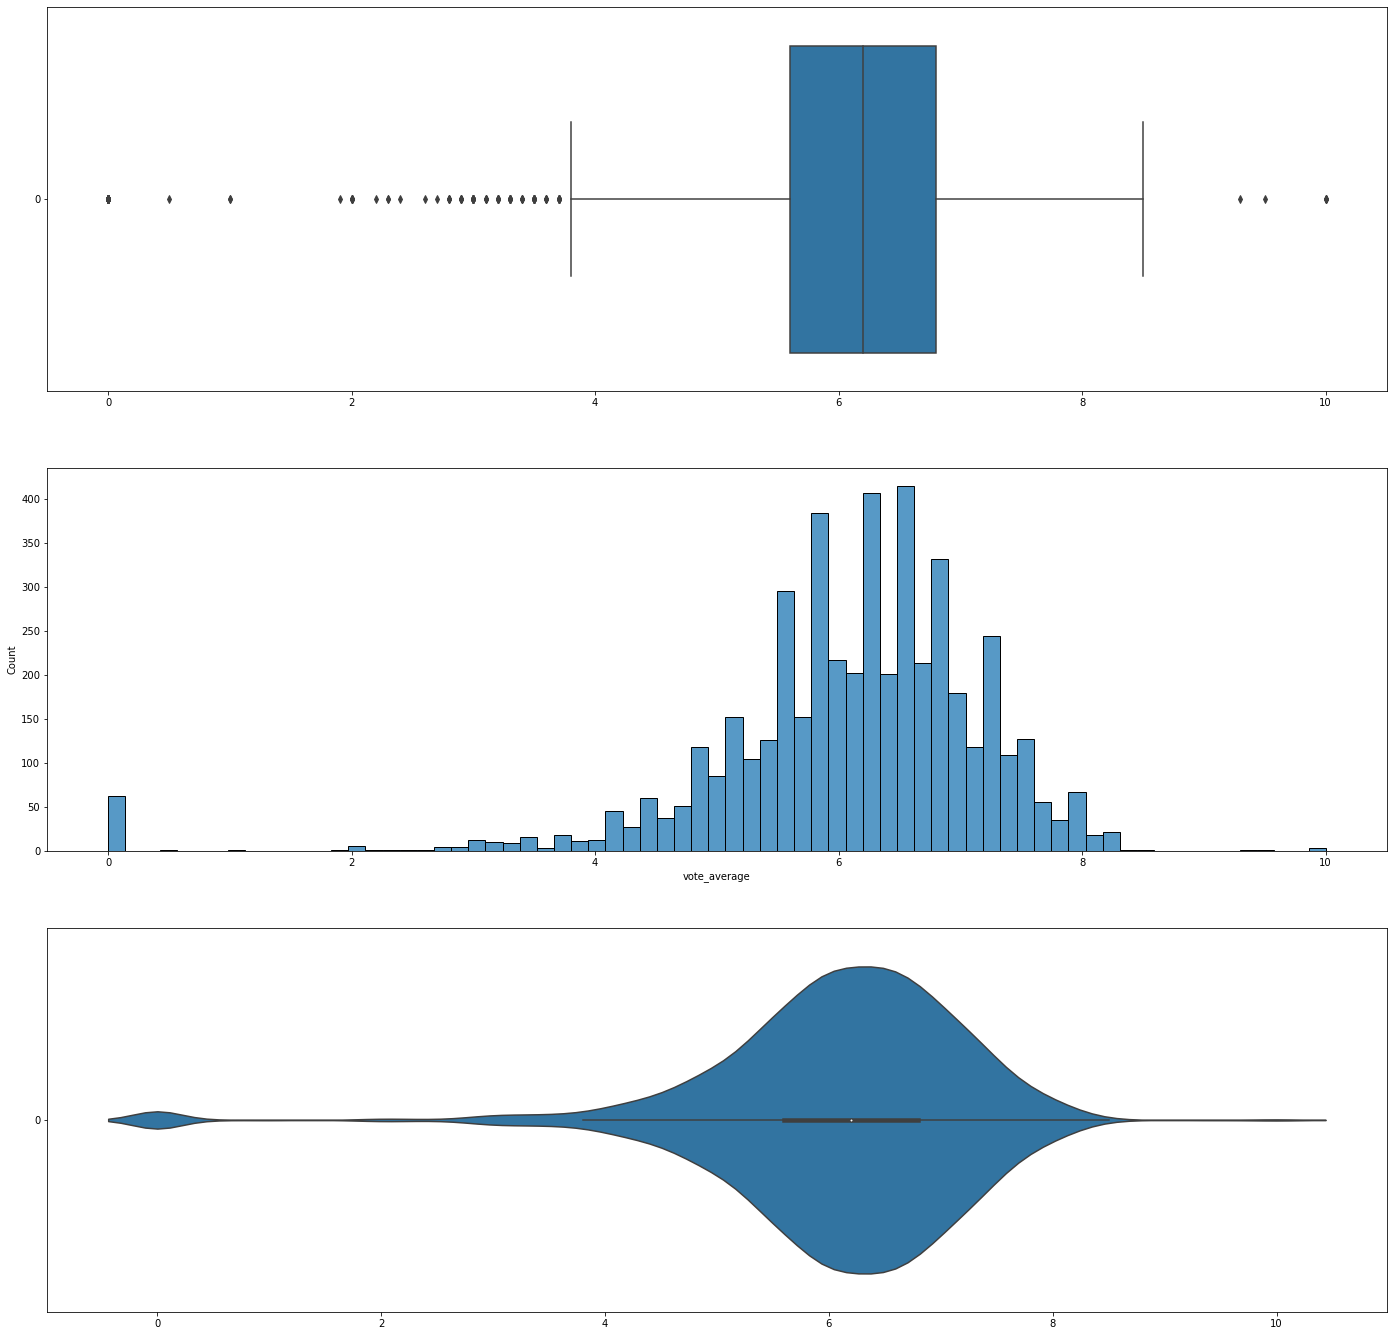

In [36]:
f, axes = plt.subplots(3,figsize=(24, 24))
sns.boxplot(data = numericalmoviedata["vote_average"], orient = "h", ax = axes[0])
sns.histplot(data = numericalmoviedata["vote_average"],ax = axes[1])
sns.violinplot(data = numericalmoviedata["vote_average"], orient = "h", ax = axes[2])

Vote average's distribution is the most centred when comparing all the numerical data. We indicate if a movie is "good" if the vote average of the movie is equal or above 7.2 as 7.2 is its 80th percentile value, so we wanted a "good" movie to rate higher than or equal to its 80th percentile value.

In [37]:
np.percentile(numericalmoviedata["vote_average"],80)

7.0

In [38]:
(numericalmoviedata["vote_average"] >= 7.0).value_counts()

False    3820
True      989
Name: vote_average, dtype: int64

Then, we look for the correlation between our numerical data.

In [39]:
numericalmoviedata.corr()

,popularity,vote_count,vote_average
popularity,1.000000,0.778205,0.273964
vote_count,0.778205,1.000000,0.313002
vote_average,0.273964,0.313002,1.000000


<AxesSubplot:>

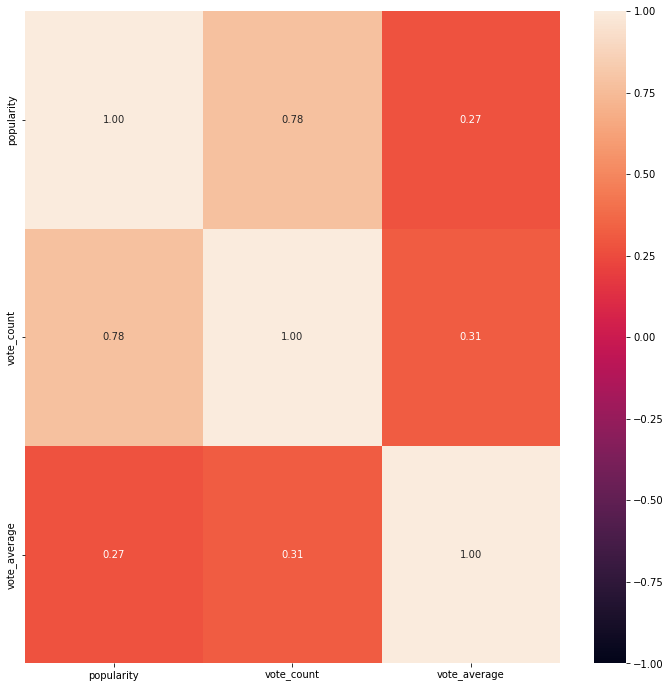

In [40]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12,12))
sns.heatmap(numericalmoviedata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Seeing from the heatmap, the correlation between vote average and all the other numerical data have a low correlation, with all of their correlation being below 0.31, with vote_count having the highest at 0.31. This shows that all the variables have a low linear correlation against vote_average. So, they have a poor linear relationship. However, this may mean that they may be non-linear relationship. 

## NLP Machine Learning Stage



### Basic Recommender

To address cold start problems such as a new user who has not watch any movies before, a basic recommender will be useful in helping them to get started watching the more popular and critically acclaimed movies to get them started on their journey. The idea behind this recommender is to sort the movies based on ratings and popularity and display the top movies of our database. 

We will be using the IMDB's weighted rating to construct our recommendations. 

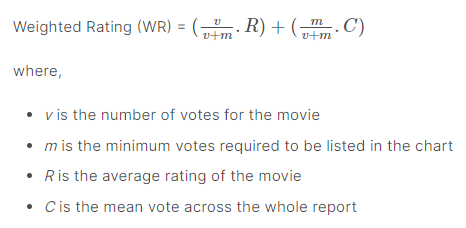

Value of C

In [41]:
vote_counts = movies_clean[movies_clean['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = movies_clean[movies_clean['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.65335828654606

Value of M

In [42]:
m = vote_counts.quantile(0.90)
m

1842.199999999998

In [43]:
movies_clean['year'] = pd.to_datetime(movies_clean['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [44]:
new_chart = movies_clean[(movies_clean['vote_count'] >= m) & (movies_clean['vote_count'].notnull()) & (movies_clean['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
new_chart['vote_count'] = new_chart['vote_count'].astype('int')
new_chart['vote_average'] = new_chart['vote_average'].astype('int')
new_chart.shape

(481, 6)

Therefore, to qualify to be considered for the chart, a movie has to have at least 1842 votes on TMDB. We also see that the average rating for a movie on TMDB is 5.653 on a scale of 10. 481 Movies qualify to be on our chart.

In [45]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [46]:
new_chart['weighted_rating'] = new_chart.apply(weighted_rating, axis=1)

In [47]:
new_chart = new_chart.sort_values('weighted_rating', ascending=False).head(10)

## Top Movies Recommended For New Users

In [48]:
new_chart.head(15)

,title,year,vote_count,vote_average,popularity,genres,weighted_rating
96,Inception,2010,13752,8,167.583710,"[Action, Thriller, Science Fiction, Mystery, A...",7.722783
65,The Dark Knight,2008,12002,8,187.322927,"[Drama, Action, Crime, Thriller]",7.687740
95,Interstellar,2014,10867,8,724.247784,"[Adventure, Drama, Science Fiction]",7.659854
662,Fight Club,1999,9413,8,146.757391,[Drama],7.615912
262,The Lord of the Rings: The Fellowship of the Ring,2001,8705,8,138.049577,"[Adventure, Fantasy, Action]",7.590130
3237,Pulp Fiction,1994,8428,8,121.463076,"[Thriller, Crime]",7.579075
1887,The Shawshank Redemption,1994,8205,8,136.747729,"[Drama, Crime]",7.569733
329,The Lord of the Rings: The Return of the King,2003,8064,8,123.630332,"[Adventure, Fantasy, Action]",7.563608
809,Forrest Gump,1994,7927,8,138.133331,"[Comedy, Drama, Romance]",7.557488
330,The Lord of the Rings: The Two Towers,2002,7487,8,106.914973,"[Adventure, Fantasy, Action]",7.536618


From this, we can see that the top 3 rated films are Inception, The Dark Knight and Interstellar. 

# Content Based Model

For our content based model, we will recommend users similar movies based on their overview description. we do not have a quantitative metric to judge our machine's performance so we judge it qualitatively.

In [49]:
movies_clean['description'] = movies_clean['overview']
movies_clean['description'] = movies_clean['description'].fillna('')

In [50]:
movies_clean.shape

(4809, 14)

In [51]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_clean['description'])

In [52]:
tfidf_matrix.shape

(4809, 136949)

## Cosine Similarity

I will be using cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. Since we used TF-IDF vectorizer, calculating dot product will directly give us the similarity score. 

In [53]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [54]:
cosine_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

We now have a pairwise cosine similarity matrix for all the movies in our dataset. We then write a function to return the top 10 most similar movies based on the cosine similarity score.

In [55]:
movies_clean = movies_clean.reset_index()
titles = movies_clean['title']
indices = pd.Series(movies_clean.index, index=movies_clean['title'])

In [56]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [57]:
get_recommendations("The Dark Knight").head(10)

3                         The Dark Knight Rises
299                              Batman Forever
428                              Batman Returns
1362                                     Batman
1363                                     Batman
3861    Batman: The Dark Knight Returns, Part 2
2513                                  Slow Burn
1184                                        JFK
119                               Batman Begins
205          Sherlock Holmes: A Game of Shadows
Name: title, dtype: object

The machine was able to identify it being a batman film and subsequently recommends other batman related films. But this is not a good system because it does not take into considerations other important features such as cast, crew, director and genre, which determines the rating and popularity of a movie. 

Therefore, we are going to use more suggestive metadata than overview to build our improved model. 

## Improved Model

For our improved model, we will create a column containing genre, director, main actors and keywords. We then use a Count Vectorizer to crete our count matrix. Thereafter we create the cosine similarities and return movies that are most similar. 

We will pick out the directors for each movie as well as the top 3 actors acted. Lesser known actors are less likely to affect a person's opinion on a movie.

In [58]:
movies_clean['cast'] = movies_clean['cast'].apply(literal_eval)
movies_clean['crew'] = movies_clean['crew'].apply(literal_eval)
movies_clean['keywords'] = movies_clean['keywords'].apply(literal_eval)

In [59]:
#find the director
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [60]:
movies_clean['director'] = movies_clean['crew'].apply(get_director)

In [61]:
movies_clean['cast'] = movies_clean['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies_clean['cast'] = movies_clean['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [62]:
movies_clean['keywords'] = movies_clean['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

Removed white spaces and changed every letter to lowercase alphabets

In [63]:
movies_clean['cast'] = movies_clean['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [64]:
movies_clean['director'] = movies_clean['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
movies_clean['director'] = movies_clean['director'].apply(lambda x: [x,x, x])

In [65]:
movies_clean.head()

,index,genres,id,keywords,original_title,overview,popularity,release_date,title,vote_average,vote_count,cast,crew,year,description,director
0,0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",2009,"In the 22nd century, a paraplegic Marine is di...","[jamescameron, jamescameron, jamescameron]"
1,1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",2007,"Captain Barbossa, long believed to be dead, ha...","[goreverbinski, goreverbinski, goreverbinski]"
2,2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",2015,A cryptic message from Bond’s past sends him o...,"[sammendes, sammendes, sammendes]"
3,3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,7.6,9106,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",2012,Following the death of District Attorney Harve...,"[christophernolan, christophernolan, christoph..."
4,4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,6.1,2124,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",2012,"John Carter is a war-weary, former military ca...","[andrewstanton, andrewstanton, andrewstanton]"


Count the frequency of every keyword in the dataset. Keywords that only occur once in our dataset has no use therefore we drop them. Finally, we convert every word to their stem to reduce the density of the matrix

In [66]:
s = movies_clean.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [67]:
s = s.value_counts()
s[:5]

woman director          324
independent film        320
duringcreditsstinger    308
based on novel          198
murder                  189
Name: keyword, dtype: int64

In [68]:
s = s[s > 1]

In [69]:
stemmer = SnowballStemmer('english')
stemmer.stem('dogs')

'dog'

In [70]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [71]:
movies_clean['keywords'] = movies_clean['keywords'].apply(filter_keywords)
movies_clean['keywords'] = movies_clean['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
movies_clean['keywords'] = movies_clean['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [72]:
movies_clean.head()

,index,genres,id,keywords,original_title,overview,popularity,release_date,title,vote_average,vote_count,cast,crew,year,description,director
0,0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[cultureclash, futur, spacewar, spacecoloni, s...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",2009,"In the 22nd century, a paraplegic Marine is di...","[jamescameron, jamescameron, jamescameron]"
1,1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabus, exoticisland, eastindiatradi...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",2007,"Captain Barbossa, long believed to be dead, ha...","[goreverbinski, goreverbinski, goreverbinski]"
2,2,"[Action, Adventure, Crime]",206647,"[spi, basedonnovel, secretag, sequel, mi6, bri...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",2015,A cryptic message from Bond’s past sends him o...,"[sammendes, sammendes, sammendes]"
3,3,"[Action, Crime, Drama, Thriller]",49026,"[dccomic, crimefight, terrorist, secretident, ...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,7.6,9106,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",2012,Following the death of District Attorney Harve...,"[christophernolan, christophernolan, christoph..."
4,4,"[Action, Adventure, Science Fiction]",49529,"[basedonnovel, mar, medallion, spacetravel, pr...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,6.1,2124,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",2012,"John Carter is a war-weary, former military ca...","[andrewstanton, andrewstanton, andrewstanton]"


In [73]:
movies_clean['final'] = movies_clean['keywords'] + movies_clean['cast'] + movies_clean['director'] + movies_clean['genres']
movies_clean['final'] = movies_clean['final'].apply(lambda x: ' '.join(x))

In [74]:
movies_clean.head()

,index,genres,id,keywords,original_title,overview,popularity,release_date,title,vote_average,vote_count,cast,crew,year,description,director,final
0,0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[cultureclash, futur, spacewar, spacecoloni, s...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",2009,"In the 22nd century, a paraplegic Marine is di...","[jamescameron, jamescameron, jamescameron]",cultureclash futur spacewar spacecoloni societ...
1,1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabus, exoticisland, eastindiatradi...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",2007,"Captain Barbossa, long believed to be dead, ha...","[goreverbinski, goreverbinski, goreverbinski]",ocean drugabus exoticisland eastindiatradingco...
2,2,"[Action, Adventure, Crime]",206647,"[spi, basedonnovel, secretag, sequel, mi6, bri...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",2015,A cryptic message from Bond’s past sends him o...,"[sammendes, sammendes, sammendes]",spi basedonnovel secretag sequel mi6 britishse...
3,3,"[Action, Crime, Drama, Thriller]",49026,"[dccomic, crimefight, terrorist, secretident, ...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,7.6,9106,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",2012,Following the death of District Attorney Harve...,"[christophernolan, christophernolan, christoph...",dccomic crimefight terrorist secretident burgl...
4,4,"[Action, Adventure, Science Fiction]",49529,"[basedonnovel, mar, medallion, spacetravel, pr...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,6.1,2124,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",2012,"John Carter is a war-weary, former military ca...","[andrewstanton, andrewstanton, andrewstanton]",basedonnovel mar medallion spacetravel princes...


In [75]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(movies_clean['final'])

In [76]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [77]:
movies_clean = movies_clean.reset_index()
titles = movies_clean['title']
indices = pd.Series(movies_clean.index, index=movies_clean['title'])

In [78]:
get_recommendations("The Dark Knight").head(10)

3          The Dark Knight Rises
119                Batman Begins
1199                The Prestige
96                     Inception
1036                    Insomnia
3578                     Memento
95                  Interstellar
428               Batman Returns
210               Batman & Robin
4644    Amidst the Devil's Wings
Name: title, dtype: object

Looking at the model output, we can see that system has recognized other Christopher Nolan films (due to the high weightage given to a director) and put them as top recommendations. This improved model is a better recommendation system compared to the first one with more variety of movies being recommended.

# Final Model

By introducing ratings and popularity into our content based model, it will remove any bad movies and only return movies which are popular and are critically aclaimed. Hence, in our final model, we will combine both the simple recommendation model with the content based model which will take the top 25 movies based on similarity score and calculate the vote of the 60th percentile movie. Thereafter, we will calculate the weighted rating using the IMDB formula. 

In [79]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = movies_clean.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['weighted_rating'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('weighted_rating', ascending=False).head(10)
    return qualified

In [80]:
improved_recommendations('The Dark Knight')

,title,vote_count,vote_average,year,weighted_rating
96,Inception,13752,8,2010,7.722783
95,Interstellar,10867,8,2014,7.659854
1199,The Prestige,4391,8,2006,7.306458
3578,Memento,4028,8,2000,7.263571
3,The Dark Knight Rises,9106,7,2012,6.773407
119,Batman Begins,7359,7,2005,6.730385
428,Batman Returns,1673,6,1992,5.818337
299,Batman Forever,1498,5,1995,5.360343
739,London Has Fallen,1621,5,2016,5.347545
9,Batman v Superman: Dawn of Justice,7004,5,2016,5.136060
